### Overview Of Data

+ SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


+ MSSubClass: The building class
+ MSZoning: The general zoning classification


+ LotFrontage: Linear feet of street connected to property
+ LotArea: Lot size in square feet
+ LotShape: General shape of property
+ LotConfig: Lot configuration


+ Street: Type of road access
+ Alley: Type of alley access
+ Utilities: Type of utilities available
+ BldgType: Type of dwelling
+ RoofStyle: Type of roof
+ Foundation: Type of foundation

+ LandContour: Flatness of the property
+ LandSlope: Slope of property
+ Neighborhood: Physical locations within Ames city limits
+ Condition1: Proximity to main road or railroad
+ Condition2: Proximity to main road or railroad (if a second is present)

+ HouseStyle: Style of dwelling
+ OverallQual: Overall material and finish quality
+ OverallCond: Overall condition rating
+ YearBuilt: Original construction date
+ YearRemodAdd: Remodel date


+ RoofMatl: Roof material
+ Exterior1st: Exterior covering on house
+ Exterior2nd: Exterior covering on house (if more than one material)

+ MasVnrType: Masonry veneer type
+ MasVnrArea: Masonry veneer area in square feet

+ ExterQual: Exterior material quality
+ ExterCond: Present condition of the material on the exterior



+ BsmtQual: Height of the basement
+ BsmtCond: General condition of the basement
+ BsmtExposure: Walkout or garden level basement walls
+ BsmtFinType1: Quality of basement finished area
+ BsmtFinSF1: Type 1 finished square feet
+ BsmtFinType2: Quality of second finished area (if present)
+ BsmtFinSF2: Type 2 finished square feet
+ BsmtUnfSF: Unfinished square feet of basement area
+ TotalBsmtSF: Total square feet of basement area


+ Heating: Type of heating
+ HeatingQC: Heating quality and condition

+ CentralAir: Central air conditioning
+ Electrical: Electrical system
+ 1stFlrSF: First Floor square feet
+ 2ndFlrSF: Second floor square feet
+ LowQualFinSF: Low quality finished square feet (all floors)
+ GrLivArea: Above grade (ground) living area square feet
+ BsmtFullBath: Basement full bathrooms
+ BsmtHalfBath: Basement half bathrooms
+ FullBath: Full bathrooms above grade
+ HalfBath: Half baths above grade
+ Bedroom: Number of bedrooms above basement level
+ Kitchen: Number of kitchens
+ KitchenQual: Kitchen quality
+ TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
+ Functional: Home functionality rating
+ Fireplaces: Number of fireplaces
+ FireplaceQu: Fireplace quality

+ GarageType: Garage location
+ GarageYrBlt: Year garage was built
+ GarageFinish: Interior finish of the garage
+ GarageCars: Size of garage in car capacity
+ GarageArea: Size of garage in square feet
+ GarageQual: Garage quality
+ GarageCond: Garage condition

+ PavedDrive: Paved driveway

+ WoodDeckSF: Wood deck area in square feet
+ OpenPorchSF: Open porch area in square feet
+ EnclosedPorch: Enclosed porch area in square feet
+ 3SsnPorch: Three season porch area in square feet
+ ScreenPorch: Screen porch area in square feet
+ PoolArea: Pool area in square feet

+ PoolQC: Pool quality
+ Fence: Fence quality
+ MiscFeature: Miscellaneous feature not covered in other categories
+ MiscVal: Value of miscellaneous feature
+ MoSold: Month Sold
+ YrSold: Year Sold
+ SaleType: Type of sale
+ SaleCondition: Condition of sale

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
print (f"Number of Ropws and Columns :{df.shape}")
print (f"Number Of Null Values : {df.isna().sum().values.sum()}")
df.head()

Number of Ropws and Columns :(1460, 81)
Number Of Null Values : 6965


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
na = df.isna().sum()

In [5]:
for i in na.index:
    if na.loc[i]:
        print (f"{i} : {na.loc[i]}")

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


### Exploring The Variables

In [6]:
df.MSSubClass.nunique()

15

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

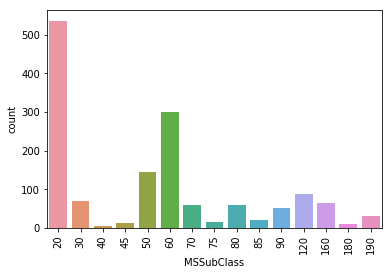

In [7]:
sns.countplot(df.MSSubClass,)
plt.xticks(rotation=90)

In [8]:
df.MSSubClass.dtype

dtype('int64')

In [9]:
df['MSSubClass'] = df.MSSubClass.apply(lambda x:f"SUBCLASS_{x}")

Text(0.5,1,'Sub Class Count')

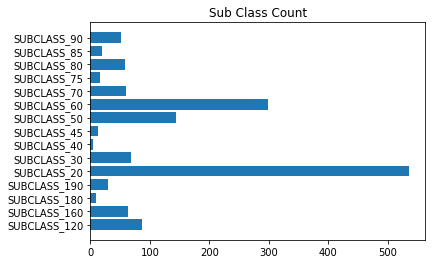

In [10]:
temp = df.MSSubClass.value_counts()
plt.barh(temp.index,temp.values)
plt.title("Sub Class Count")

In [11]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

Text(0.5,1,'The general zoning classification')

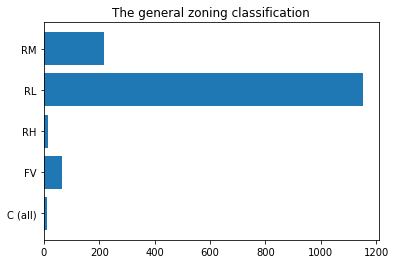

In [12]:
temp = df.MSZoning.value_counts()
plt.barh(temp.index,temp.values)
plt.title("The general zoning classification")

Text(0.5,1,'Linear feet of street connected to property')

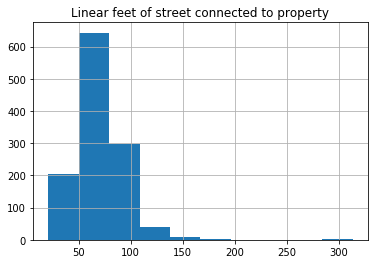

In [13]:
df.LotFrontage.hist().set_title("Linear feet of street connected to property")

In [14]:
df['LotFrontage'] = df.LotFrontage.fillna(value=np.mean(df.LotFrontage).astype(int),)

Text(0.5,1,'Lot size in square feet')

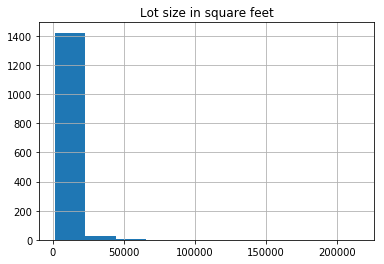

In [15]:
df.LotArea.hist().set_title("Lot size in square feet")

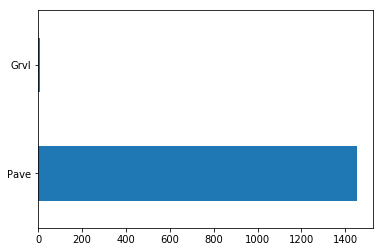

In [16]:
df.Street.value_counts().plot.barh()

In [17]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [18]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [19]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [20]:
df['Alley'] = df.Alley.fillna(value="<UNK>")

In [21]:
df.Alley.value_counts()

<UNK>    1369
Grvl       50
Pave       41
Name: Alley, dtype: int64

In [22]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
df['MasVnrType'] = df.MasVnrType.fillna(value="None")

In [28]:
df.BsmtQual.

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [25]:
na = df.isna().sum()

for i in na.index:
    if na.loc[i]:
        print (f"{i} : {na.loc[i]}")

MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406
